In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
categorical = pd.read_csv("categorical.csv")
numerical = pd.read_csv("numerical.csv")
target = pd.read_csv("target.csv")

In [3]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [4]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [10]:
data = pd.concat([numerical,categorical],axis = 1)

In [5]:
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [8]:
# ok so lets go with the upscaling
target["TARGET_B"].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [11]:
X = data
y = target["TARGET_B"]

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2
X_train_imb = pd.DataFrame(X_train) # u only balance the train data.
trainset = pd.concat((X_train, y_train), axis=1)


In [17]:
# oversample the data
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))
train_upsampled = pd.concat([category_1_oversampled, category_0], axis=0)

In [18]:
train_upsampled

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B
16929,0,49.000000,1,9,0,0,6,20,42,5,...,3,92,7,93,8,95,12,92,3,1
49955,0,61.611649,5,9,0,0,34,39,33,2,...,2,92,7,96,2,96,2,90,10,1
73260,4,45.000000,4,6,3,0,25,47,14,9,...,2,87,5,94,2,95,10,86,10,1
65267,2,56.000000,4,9,0,9,38,28,26,4,...,6,88,9,96,2,96,2,88,9,1
76024,0,42.000000,5,9,0,0,42,48,22,4,...,1,95,11,95,11,95,11,95,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,94.000000,5,9,0,0,33,21,33,13,...,2,87,1,90,8,95,7,87,1,0
21243,0,70.000000,3,9,5,2,37,10,32,26,...,8,95,12,94,10,97,2,86,12,0
45891,2,66.000000,3,6,0,0,36,11,62,4,...,1,96,2,96,2,96,2,96,2,0
43567,1,76.000000,5,3,1,0,59,22,31,3,...,7,87,11,95,12,96,3,86,9,0


In [19]:
#so the upsampled data is in order ,so better to mix it just in case we do a cross validation in the future.
train_upsampled = train_upsampled.sample(frac=1)
train_upsampled["TARGET_B"].value_counts()

0    67970
1    67970
Name: TARGET_B, dtype: int64

In [20]:
# i will just normalize all my data, i prefer to do it just in case
X_train = train_upsampled.drop('TARGET_B',axis = 1)
y_train = train_upsampled['TARGET_B']
len(X_train.columns)

337

In [21]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.shape

(135940, 337)

In [25]:
#splitting into categorical and numerical
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [26]:
# normalize numericals
transformer = MinMaxScaler().fit(X_train_num) 
numericals_train_scaled = transformer.transform(X_train_num)
numericals_test_scaled = transformer.transform(X_test_num)

In [27]:
# encode categoricals
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
categoricals_train_encoded = encoder.transform(X_train_cat).toarray()
categoricals_test_encoded = encoder.transform(X_test_cat).toarray()

In [28]:
X_train = np.concatenate((numericals_train_scaled,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_scaled,categoricals_test_encoded),axis=1)

In [34]:
# and we are ready to go with the random forest model

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

class_model = clf.fit(X_train, y_train)

0.6242754156245403
0.6031945667211671


0    22599
1     1254
Name: TARGET_B, dtype: int64

array([[13695,  8904],
       [  561,   693]], dtype=int64)

In [37]:
print("precision: ",precision_score(y_test,y_pred))    
print("recall: ",recall_score(y_test,y_pred))  # i think that in this case we prefer higher recall  
print("f1: ",f1_score(y_test,y_pred))

precision:  0.07221006564551423
recall:  0.5526315789473685
f1:  0.12773016311860658


In [40]:
# ok so we have some decent scores already ,but we want to make it better with feature selection ,im curious about PCA so i will use that one.
pca = PCA()
pca.fit(X_train)

PCA()

In [44]:
#pca.explained_variance_ratio_
exp_var_pca = pca.explained_variance_ratio_
cum_sum_variance = np.cumsum(exp_var_pca)


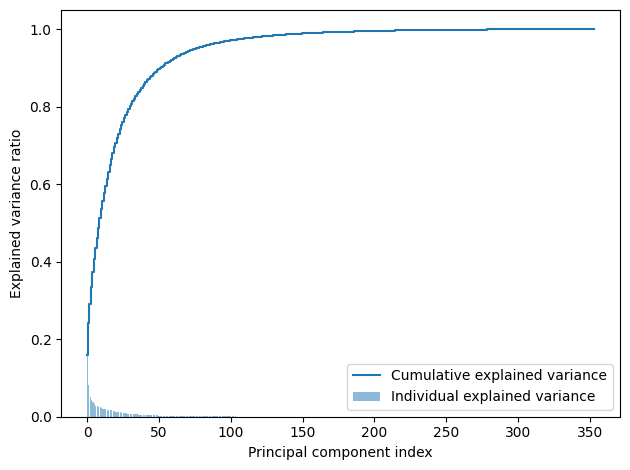

In [58]:
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_variance)), cum_sum_variance, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [82]:
# chose number of dimensions i will go with 9 since there is where the curve flattens out
pca = PCA(70)
pca.fit(X_train)

PCA(n_components=70)

In [83]:
sum(pca.explained_variance_ratio_) #that means that my pca only explains 50% of the variance (9 pca) so i will try with more

0.9409751043077603

In [84]:
# i will stay with 70 components
pca.explained_variance_ratio_

array([0.15869654, 0.08303463, 0.05049926, 0.04372629, 0.03824116,
       0.03328359, 0.02766951, 0.02695978, 0.02593856, 0.023845  ,
       0.02365512, 0.0211858 , 0.01997774, 0.01899928, 0.01864137,
       0.01771846, 0.01702881, 0.01649134, 0.01520633, 0.01440713,
       0.0124841 , 0.01177969, 0.01162386, 0.01100605, 0.01050389,
       0.00934717, 0.00857273, 0.00836724, 0.00797683, 0.00726309,
       0.00703162, 0.00684298, 0.00659893, 0.00642914, 0.00609531,
       0.00577407, 0.00570594, 0.00558566, 0.00543002, 0.00498146,
       0.0048057 , 0.00456348, 0.00429502, 0.0041323 , 0.0039696 ,
       0.00395191, 0.00375075, 0.00360885, 0.00341037, 0.00327965,
       0.00311905, 0.00308956, 0.00297104, 0.00290136, 0.00280184,
       0.00265836, 0.00252476, 0.00248008, 0.00240745, 0.00232414,
       0.00221648, 0.00214928, 0.00210986, 0.00204106, 0.00191795,
       0.00189976, 0.00182673, 0.00176354, 0.00171728, 0.00168244])

In [85]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [86]:
pd.DataFrame(X_test_pca)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-1.650252,-0.280082,0.327529,0.401578,-0.428510,0.273223,-0.504499,-0.350280,0.433936,0.084812,...,0.057715,0.209766,-0.170520,-0.003545,0.015235,-0.103331,0.162209,-0.102234,-0.028270,-0.071956
1,0.417269,1.284153,-1.528782,0.167926,-0.844600,-0.339486,0.621668,-0.426783,-0.213259,0.693597,...,-0.070090,0.072408,0.087273,-0.105821,-0.145033,0.069458,0.017967,0.277330,0.253796,-0.115778
2,-2.199216,-1.041340,-0.867025,0.188744,0.307687,-0.003566,-0.273287,-0.706093,0.681005,-0.445697,...,0.172566,-0.023697,0.038152,0.068508,0.155532,-0.026704,0.085921,0.015030,0.146726,-0.036426
3,-0.688843,-0.848593,-0.519551,-0.502364,0.850241,-0.524981,-0.196404,0.491328,-0.294820,0.917166,...,0.128186,0.063799,0.315890,-0.191215,-0.093053,0.034921,-0.063251,0.169086,0.071027,-0.083691
4,0.276270,0.030377,0.079138,-1.392540,-1.044984,-0.382630,-0.729608,0.053476,-0.891713,-0.004236,...,0.493256,-0.111621,0.388941,0.281576,0.693862,0.281964,0.117090,-0.218936,0.090815,-0.116913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23848,-1.005230,0.702165,0.243355,0.103698,-0.793692,-1.321816,-0.149199,0.323271,-0.681084,0.489667,...,0.171477,0.031411,-0.068744,0.052252,0.158419,0.163474,-0.035689,0.039022,-0.033724,-0.020930
23849,-1.519320,0.473110,-1.182268,1.006714,-0.560942,-0.208174,-0.037849,-0.579789,0.513765,0.220904,...,0.083086,0.140356,-0.133155,-0.001136,-0.083383,0.040852,0.174575,-0.015108,-0.146790,-0.136043
23850,1.280484,0.454008,-0.513204,-0.440100,0.973990,0.359119,-1.436339,-0.015874,-0.230162,0.063610,...,-0.026691,-0.366098,-0.190682,0.087716,0.011769,0.022591,-0.040009,0.026849,-0.002048,-0.097833
23851,-1.633538,1.780890,1.647246,1.082320,1.235096,0.226172,-0.156439,0.542961,0.047138,-0.056829,...,-0.067283,-0.056835,0.439582,0.059496,0.580088,0.095363,-0.181679,0.169241,0.283232,0.068912


In [87]:
# now run the randomforest model again to see the changes in the results
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)
clf.fit(X_train_pca, y_train)
print(clf.score(X_train_pca, y_train))
print(clf.score(X_test_pca, y_test))

y_pred = clf.predict(X_test_pca)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

class_model = clf.fit(X_train_pca, y_train)

0.6294100338384582
0.6187481658491595


0    22599
1     1254
Name: TARGET_B, dtype: int64

array([[14102,  8497],
       [  597,   657]], dtype=int64)

# well not too much of a change tbh
+ true negatives 14102 non donors were correctly identified
+ false positives 8497 actual non donors were incorrectly predicted as donors
+ false negatives 597 actual donors were missed and predicted as non donors
+ true positives 657 actual donors were correctly predicted

+ *False Positives*: In a donor solicitation scenario, false positives represent wasted resources since they indicate non-donors who were targeted as potential donors. The cost here includes marketing materials, postage, and time spent on outreach.
+ *False Negatives*: False negatives represent lost donation opportunities. These are individuals who would have donated but were not solicited by the organization.